In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
#implement thompson sampling
import random
N =1000
d = 10
ads_selected =[]
number_of_reward_1 = [0]*d
number_of_reward_0 = [0]*d
total_reward = 0

for n in range(0 ,N):
    ad = 0
    max_random = 0
    for i in range(0,4):
        random_beta = random.betavariate(number_of_reward_1[i]+1,number_of_reward_0[i]+1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward ==1:
        number_of_reward_1[ad] = number_of_reward_1[ad] +1
    else:
        number_of_reward_0[ad] = number_of_reward_0[ad]+1
    total_reward +=reward

Text(0, 0.5, 'No of times the ad was selected')

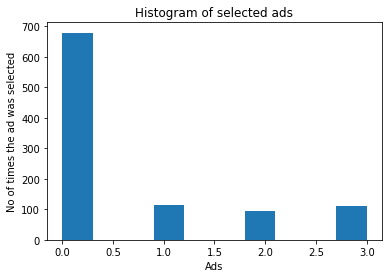

In [10]:
#Visualize the result
plt.hist(ads_selected)
plt.title('Histogram of selected ads')
plt.xlabel('Ads')
plt.ylabel('No of times the ad was selected')